# Interessting notes
- Walking and running is easily classified by Kmeans
- going up and down stairs is harder to classify
  - Especially when going down stairs!
  - We cannot explain this yet
- Overal accuracy is 0.82, but RF is way better for this relativly simple dataset (1.0)

In [119]:
# ------ Imports ------ #
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from util import computeFeatureImportance
from sklearn.tree import DecisionTreeClassifier

In [120]:
# Setting seed and random state to be able to reproduce results
np.random.seed(42)

In [121]:
# ------ Settings ------ #
n_clusters = 4
train_size = 0.8

In [122]:
# ------ Data import ------ #
print("Importing data...")
x = pd.read_csv(r'Data Gathering and Preprocessing/features_Walking_scaled.csv')
print("Data imported")
print(f"Shape of data: {x.shape}")
print("Done")

Importing data...
Data imported
Shape of data: (3290, 27)
Done


In [123]:
# ------ shuffling + train, test split ------ #
print("shuffling data and splitting data into train and test...")
train, test = train_test_split(x, train_size=train_size, shuffle=True)
print("Done")

shuffling data and splitting data into train and test...
Done


In [124]:
# ------ x, y split ------ #

print("Splitting data into x and y...")
le = LabelEncoder()
le.fit(train["label"])
print(f"Classes: {le.classes_}")

y_train = le.transform(train["label"])
x_train = train.copy()
x_train = x_train.drop(["label", "time", "ID"], axis=1)

y_test = le.transform(test["label"])
x_test = test.copy()
x_test = x_test.drop(["label", "time", "ID"], axis=1)
print("Done")

Splitting data into x and y...
Classes: ['running' 'stairs_down' 'stairs_up' 'walking']
Done


In [125]:
# ------ PCA ------ #

print("starting PCA...")
pca = PCA(2)
df = pca.fit_transform(x_train)
df_test = pca.fit_transform(x_test)

x_train_pca = np.array(df)
x_test_pca = np.array(df_test)
print("Done")

starting PCA...
Done


In [126]:
# ------ Training KMeans ------ #

print("Training KMeans...")
model = KMeans(n_clusters=n_clusters)
model.fit(x_train)
label = model.labels_
print("Training done")

pred_y = model.predict(x_test)
print(f"KMeans accuracy: {accuracy_score(y_test, pred_y)}")

model = KMeans(n_clusters=n_clusters)
model.fit(df)
label = model.labels_

Training KMeans...
Training done
KMeans accuracy: 0.04559270516717325


In [127]:
# ------ centroid ------ #

print("Calculating centroids...")
centroids = model.cluster_centers_
u_labels = np.unique(label)

cdict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'brown', 5: 'purple', 6: 'orange', 7: 'pink'}
ldict = {}
for i in range(len(u_labels)):
    ldict[i] = le.classes_[i]
    
print("predicting...")
pred = model.predict(df_test)
print("Done")

Calculating centroids...
predicting...
Done


Plotting model and test data...


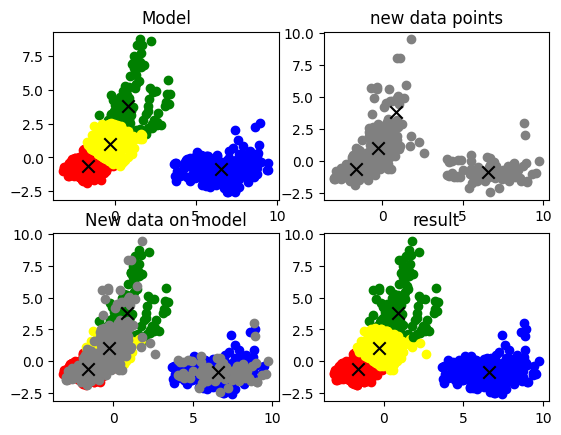

plotting model vs actual...


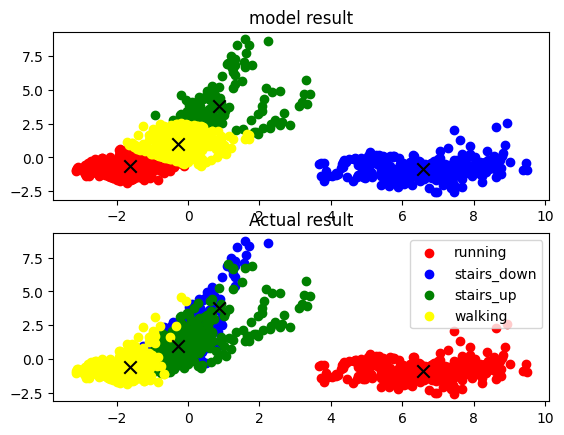

In [128]:
print("Plotting model and test data...")

fig, axs = plt.subplots(2, 2)

axs[0, 0].title.set_text('Model')
for l in u_labels:
    ii = np.where(label == l)
    axs[0, 0].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
# axs[0, 0].scatter(df[:, 0], df[:, 1], c=label)

axs[0, 0].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')

# ------ prediction test data ------ #
# Make predictions on the test data

axs[0, 1].title.set_text('new data points')
axs[0, 1].scatter(df_test[:, :1], df_test[:, 1:], c='grey')
axs[0, 1].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')

# create second plot which show new points whichout prediction
axs[1, 0].title.set_text('New data on model')
for l in u_labels:
    ii = np.where(label == l)
    axs[1, 0].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
axs[1, 0].scatter(df_test[:, :1], df_test[:, 1:], c='grey')
axs[1, 0].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')

# create third plot which show the predictions of the new points
axs[1, 1].title.set_text('result')
for l in u_labels:
    ii = np.where(label == l)
    axs[1, 1].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
for l in u_labels:
    ii = np.where(pred == l)
    axs[1, 1].scatter(x_test_pca[ii, 0], x_test_pca[ii, 1], c=cdict[l])
axs[1, 1].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')
plt.show()

print("plotting model vs actual...")
fig, axs = plt.subplots(2)
axs[0].title.set_text('model result')
for l in u_labels:
    ii = np.where(label == l)
    axs[0].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
axs[0].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')

axs[1].title.set_text('Actual result')
for l in u_labels:
    ii = np.where(y_train == l)
    axs[1].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
axs[1].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')
axs[1].legend()
plt.show()

In [129]:
x

,ID,label,time,acc_x_min,acc_x_max,acc_x_avg,acc_x_std,acc_x_AUC,acc_x_pk,acc_x_cn,...,acc_y_cn,acc_y_pw,acc_z_min,acc_z_max,acc_z_avg,acc_z_std,acc_z_AUC,acc_z_pk,acc_z_cn,acc_z_pw
0,0,stairs_up,56.325218,1.093242,0.498328,1.108551,-0.272376,1.108551,-0.900983,-0.352433,...,-0.989707,0.451261,0.382132,-0.277594,0.119021,-0.617181,0.119021,2.101543,0.603478,-0.280931
1,1,stairs_up,56.525955,1.093242,0.498328,1.130688,-0.225580,1.130688,0.600280,-0.033796,...,-0.989707,0.351060,0.382132,-0.277594,0.110853,-0.631454,0.110853,-0.900983,0.603478,-0.224202
2,2,stairs_up,56.726688,1.093242,0.498328,1.140266,-0.242913,1.140266,0.099859,-0.989707,...,-0.989707,0.285603,0.382132,-0.277594,0.138066,-0.670300,0.138066,2.101543,0.603478,-0.274607
3,3,stairs_up,56.927425,1.093242,0.498328,1.135590,-0.241928,1.135590,0.099859,-0.671070,...,-0.989707,0.340817,0.382132,-0.277594,0.148327,-0.668336,0.148327,3.102385,0.284841,-0.327971
4,4,stairs_up,57.128162,1.093242,0.498328,1.123139,-0.255623,1.123139,0.600280,0.603478,...,0.603478,0.652610,0.382132,-0.269169,0.155099,-0.655867,0.155099,3.102385,1.240752,-0.143523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,3285,walking,331.410736,0.984278,0.357165,0.826147,-0.222226,0.826147,-0.402767,-0.675283,...,-0.357348,-0.701777,0.852813,0.026290,0.423217,-0.517530,0.423217,-0.402767,-0.675283,-0.704083
3286,3286,walking,331.617310,0.739928,0.357165,0.776872,-0.116368,0.776872,-0.402767,-0.993217,...,-0.675283,-0.701986,0.708836,0.026290,0.384201,-0.468131,0.384201,-0.402767,-0.357348,-0.704156
3287,3287,walking,331.823883,0.739928,0.357165,0.766708,-0.089585,0.766708,-0.402767,-0.993217,...,-0.675283,-0.701787,0.674755,0.026290,0.352144,-0.429228,0.352144,-0.402767,-0.675283,-0.704112
3288,3288,walking,332.030457,0.739928,0.357165,0.748878,-0.127794,0.748878,0.096551,-0.039413,...,-0.357348,-0.701694,0.674755,0.026290,0.303631,-0.427065,0.303631,-0.402767,0.596457,-0.703677


In [130]:
model = KMeans(n_clusters=n_clusters)
model.fit(x_train)

KMeans(n_clusters=4)

In [131]:

x_test_walking = test[test["label"] == "walking"]
y_test_walking = le.transform(x_test_walking["label"])
x_test_walking = x_test_walking.drop(["label", "time", "ID"], axis=1)
print(x_test_walking)
print(y_test_walking)

      acc_x_min  acc_x_max  acc_x_avg  acc_x_std  acc_x_AUC  acc_x_pk  \
3159   0.736567   0.244601   0.816506  -0.094162   0.816506 -0.402767   
1926   0.920040   0.450276   0.882801   0.164384   0.882801  0.595870   
3173   0.741048   0.284949   0.723553  -0.034731   0.723553  0.595870   
2986   0.797631   0.478930   0.782008  -0.049274   0.782008 -0.402767   
2367   0.783532   0.312273   0.740343  -0.102376   0.740343 -0.402767   
...         ...        ...        ...        ...        ...       ...   
2222   0.916865   0.349295   0.842854  -0.098752   0.842854  0.096551   
2050   1.004353   0.413863   0.832376  -0.083437   0.832376 -0.402767   
2542   0.884466   0.330008   0.791603  -0.292460   0.791603 -0.402767   
2159   0.833112   0.324521   0.889967  -0.059893   0.889967 -0.402767   
2775   0.823775   0.522104   0.799463   0.051237   0.799463 -0.402767   

      acc_x_cn  acc_x_pw  acc_y_min  acc_y_max  ...  acc_y_cn  acc_y_pw  \
3159 -0.993217 -0.703074  -1.509927  -1.053903  

In [132]:
x_test_running = test[test["label"] == "running"]
y_test_running = le.transform(x_test_running["label"])
x_test_running = x_test_running.drop(["label", "time", "ID"], axis=1)
print(x_test_running)
print(y_test_running)

      acc_x_min  acc_x_max  acc_x_avg  acc_x_std  acc_x_AUC  acc_x_pk  \
1407   0.058323   3.299404   1.245860   3.332526   1.245860  1.599743   
1345   0.229752   3.331327   1.605301   3.405439   1.605301  1.599459   
1546  -0.451479   4.231396   1.678026   5.422400   1.678026  2.099571   
1242   0.194271   2.504417   1.643658   2.947726   1.643658  1.601001   
1509   0.131152   3.347733   1.348143   3.761273   1.348143  1.599459   
...         ...        ...        ...        ...        ...       ...   
1338  -0.467913   3.379656   1.726184   4.036011   1.726184  1.599459   
1352   0.417613   2.443008   1.297475   2.638956   1.297475  1.599459   
1480   0.264859   3.523312   1.379245   3.927180   1.379245  1.599459   
1196   0.035168   2.953786   1.707854   3.280732   1.707854  1.601001   
1190  -0.185934   3.307385   1.522636   3.855872   1.522636  1.601001   

      acc_x_cn  acc_x_pw  acc_y_min  acc_y_max  ...  acc_y_cn  acc_y_pw  \
1407  0.283523  2.974391  -0.148959   1.742240  

In [133]:
x_test_stairs_down = test[test["label"] == "stairs_down"]
y_test_stairs_down = le.transform(x_test_stairs_down["label"])
x_test_stairs_down = x_test_stairs_down.drop(["label", "time", "ID"], axis=1)
print(x_test_stairs_down)
print(y_test_stairs_down)

      acc_x_min  acc_x_max  acc_x_avg  acc_x_std  acc_x_AUC  acc_x_pk  \
945    0.824335   0.261561   0.778218  -0.232508   0.778218  0.099859   
857    1.020039   0.412311   0.891635  -0.446674   0.891635 -0.900843   
921    0.813504   0.229194   0.749406  -0.388963   0.749406 -0.900983   
1113   1.321439   0.753052   1.120465  -0.171300   1.120465 -0.400164   
1135   1.440954   0.510299   1.165126  -0.464392   1.165126 -0.400164   
...         ...        ...        ...        ...        ...       ...   
742    1.507807   0.526261   1.414163  -0.451119   1.414163 -0.900885   
1025   0.866538   0.130984   0.634091  -0.383365   0.634091 -0.900983   
802    1.468218   0.498549   1.104895  -0.499523   1.104895 -0.900885   
839    1.355800   0.276858   1.004652  -0.507550   1.004652 -0.400282   
817    1.186986   0.361544   0.998879  -0.371101   0.998879  0.600839   

      acc_x_cn  acc_x_pw  acc_y_min  acc_y_max  ...  acc_y_cn  acc_y_pw  \
945   0.922115  0.568342  -2.142979  -1.050190  

In [134]:
x_test_stairs_up = test[test["label"] == "stairs_up"]
y_test_stairs_up = le.transform(x_test_stairs_up["label"])
x_test_stairs_up = x_test_stairs_up.drop(["label", "time", "ID"], axis=1)
print(x_test_stairs_up)
print(y_test_stairs_up)

     acc_x_min  acc_x_max  acc_x_avg  acc_x_std  acc_x_AUC  acc_x_pk  \
239   1.476808   0.528478   1.420348  -0.422865   1.420348 -0.901003   
203   1.499590   0.729774   1.413938  -0.176728   1.413938  0.099799   
332   1.570552   0.740858   1.291735  -0.226829   1.291735 -0.400979   
134   1.575034   0.423839   1.218756  -0.464325   1.218756 -0.401022   
52    1.104073   0.751943   1.107412  -0.041929   1.107412  0.099859   
..         ...        ...        ...        ...        ...       ...   
108   1.331523   0.636442   1.199925  -0.186909   1.199925  0.599360   
318   1.495109   0.542666   1.274539  -0.227634   1.274539 -0.400979   
56    1.289320   0.447782   1.132788  -0.208346   1.132788 -0.400562   
468   1.290440   0.650852   1.290581  -0.120291   1.290581  0.099859   
535   0.395204   1.072288   1.266890   0.140413   1.266890 -0.900983   

     acc_x_cn  acc_x_pw  acc_y_min  acc_y_max  ...  acc_y_cn  acc_y_pw  \
239  0.284725  0.873266  -0.110490  -0.661342  ...  0.603350 

In [135]:
y_pred_walking = model.predict(x_test_walking)
print(y_pred_walking)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]


In [136]:
y_pred_running = model.predict(x_test_running)
print(y_pred_running)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [137]:
y_pred_stairs_down = model.predict(x_test_stairs_down)
print(y_pred_stairs_down)

[3 2 2 2 3 3 2 3 3 2 3 3 3 2 2 2 3 2 2 3 2 3 3 2 3 3 2 2 3 2 3 2 2 2 3 3 2
 3 2 2 3 2 2 2 3 3 2 3 2 3 3 3 3 3 2 3 2 2 3 3 3 3 2 3 3 2 3 3 3 3 3 2 3 3
 3 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 2 3 2 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3
 2 3 3 3 3 3 2 3 2 3 2 2 3]


In [138]:
y_pred_stairs_up = model.predict(x_test_stairs_up)
print(y_pred_stairs_up)

[3 2 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 0 2 3 3 3 3 3 2 3 3
 3 3 3 3 2 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 3 3 2 3 2 0 2 3
 3 2 2 3 2 3 3 3 3 3 2 3 3 2 2 3 3 3 3 3 3 3 2 3 3 3 2 3 2 2 3 0 2 3 2 2 3
 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3]


In [139]:
unique, counts = np.unique(y_pred_walking, return_counts=True)

count_dict_walking = dict(zip(unique, counts))
print("walking")
print(count_dict_walking)

walking
{0: 312, 2: 6}


In [140]:
unique, counts = np.unique(y_pred_running, return_counts=True)

count_dict_running = dict(zip(unique, counts))
print("running")
print(count_dict_running)

running
{1: 85}


In [141]:
unique, counts = np.unique(y_pred_stairs_up, return_counts=True)

count_dict_stairs_up = dict(zip(unique, counts))
print("stairs_up")
print(count_dict_stairs_up)

stairs_up
{0: 3, 2: 30, 3: 98}


In [142]:
unique, counts = np.unique(y_pred_stairs_down, return_counts=True)

count_dict_stairs_down = dict(zip(unique, counts))
print("stairs_down")
print(count_dict_stairs_down)

stairs_down
{2: 43, 3: 81}


In [143]:
transform_dict = {0: "walking", 1: "running", 3: "stairs_up", 2: "stairs_down"}

In [144]:
walking_acc = count_dict_walking[0] / (count_dict_walking[0] + count_dict_walking[2])
print("walking_acc")
print(walking_acc)

walking_acc
0.9811320754716981


In [145]:
running_acc = count_dict_running[1] / (count_dict_running[1])
print("running_acc")
print(running_acc)

running_acc
1.0


In [146]:
stairs_up_acc = count_dict_stairs_up[3] / (count_dict_stairs_up[2] + count_dict_stairs_up[0] + count_dict_stairs_up[3])
print("stairs_up_acc")
print(stairs_up_acc)

stairs_up_acc
0.7480916030534351


In [147]:
stairs_down_acc = count_dict_stairs_down[2] / (count_dict_stairs_down[3] + count_dict_stairs_down[2])
print("stairs_down_acc")
print(stairs_down_acc)

stairs_down_acc
0.3467741935483871


In [148]:
# Using best case scenario! (walking = 0, running = 1, stairs_up = 3, stairs_down = 2)
print("Accuracy of kmeans with walking dataset:")
print((walking_acc * len(y_pred_walking) + running_acc * len(y_pred_running) + stairs_up_acc * len(y_pred_stairs_up) + stairs_down_acc * len(y_pred_stairs_down)) / (len(y_pred_walking) + len(y_pred_running) + len(y_pred_stairs_up) + len(y_pred_stairs_down)))

Accuracy of kmeans with walking dataset:
0.817629179331307


In [149]:
print("Training Random Forest model...")
rf = RF()
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = rf.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"rf: {accuracy_train=}, {accuracy_test=}")

Training Random Forest model...
rf: accuracy_train=1.0, accuracy_test=1.0
